In [21]:
import scanpy as sc
import anndata
import pandas as pd
import os
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import torch
from HIST2ST import Hist2ST
import random
from predict import pk_load, test
from torch.utils.data import DataLoader

batch_id = '151673'


# genes = adata.shape[1] # number of genes
tag='5-7-2-8-4-16-32'
k,p,d1,d2,d3,h,c=map(lambda x:int(x),tag.split('-'))
dropout=0.2
random.seed(12000)
np.random.seed(12000)
torch.manual_seed(12000)
torch.cuda.manual_seed(12000)
torch.cuda.manual_seed_all(12000)  
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

n_genes = 1000

model=Hist2ST(
    depth1=d1, depth2=d2, depth3=d3,
    n_genes=n_genes, 
    kernel_size=k, patch_size=p,
    fig_size=112,
    learning_rate=1e-5,
    heads=h, channel=c, dropout=dropout,
    zinb=0.25, nb=False,
    bake=5, lamb=0.5, 
)



In [2]:
device = torch.device("cuda:4" if torch.cuda.is_available() else "cpu")
model.load_state_dict(torch.load(f'./model/5-Hist2ST.ckpt', map_location=device))    

<All keys matched successfully>

In [3]:
testset = pk_load(batch_id,'test',dataset='dlpfc',flatten=False,adj=True,ori=True)
test_loader = DataLoader(testset, batch_size=1, shuffle=False, num_workers=0)

Loading data...
Loading image...
Extracting patches...
(3611, 112, 112, 3)
Done!


In [8]:
sample = next(iter(test_loader))
patch, position, exp, center, adj = sample


In [11]:
print(patch.shape)
print(position.shape)
print(exp.shape)
print(center.shape)
print(adj.shape)

torch.Size([1, 3611, 3, 112, 112])
torch.Size([1, 3611, 2])
torch.Size([1, 3611, 1000])
torch.Size([1, 3611, 2])
torch.Size([1, 3611, 3611])


In [18]:
patch, position, adj = patch.to(device), position.to(device), adj.to(device).squeeze(0)

RuntimeError: CUDA error: device-side assert triggered
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


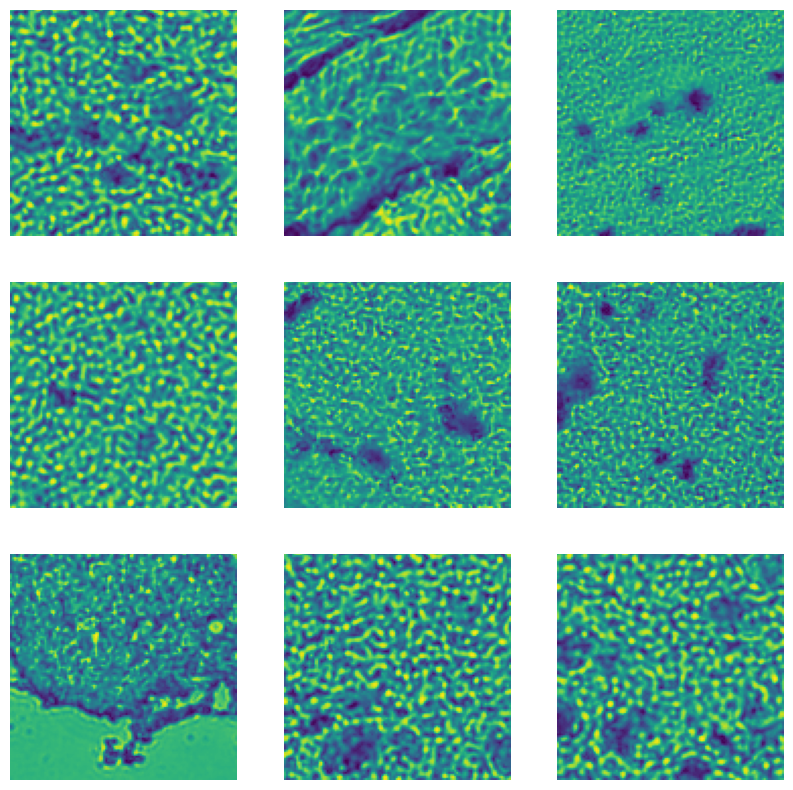

In [15]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(patch[0][i][0].cpu().numpy())
    plt.axis('off')
plt.show()

In [ ]:
# 

In [17]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


In [5]:
device

device(type='cuda', index=4)

In [6]:
pred, gt = test(model, test_loader, device=device)

  0%|          | 0/3611 [00:00<?, ?it/s]../aten/src/ATen/native/cuda/Indexing.cu:1146: indexSelectLargeIndex: block: [66,0,0], thread: [96,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1146: indexSelectLargeIndex: block: [66,0,0], thread: [97,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1146: indexSelectLargeIndex: block: [66,0,0], thread: [98,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1146: indexSelectLargeIndex: block: [66,0,0], thread: [99,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1146: indexSelectLargeIndex: block: [66,0,0], thread: [100,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1146: indexSelectLargeIndex: block: [66,0,0], thread: [101,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
../aten/src/ATen/native/cuda/Indexing.cu:1146:

RuntimeError: CUDA error: device-side assert triggered
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [20]:
temp = pd.read_csv('/home/lytq/Hist2ST/data/her2st/data/ST-cnts/A1.tsv', sep='\t', index_col=0)
temp

,FO538757.1,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,...,RAB39B,CLIC2,TMLHE,SPRY3,VAMP7,ZFY,TBL1Y,UTY,KDM5D,EIF1AY
10x13,0,6,1,0,0,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10x14,0,6,3,1,0,0,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10x15,1,1,0,0,0,0,6,1,2,0,...,0,0,0,0,0,0,0,0,0,0
10x16,0,6,1,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10x17,0,1,2,0,0,0,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9x23,1,1,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9x24,0,1,5,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9x25,0,3,1,0,0,0,8,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9x26,0,2,2,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
